In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# <center> <h1 style="background-color:darkred; color:white" >Red-Wine Quality &#127863;</h1>
<center><img
src="https://eniyi-haber.com/wp-content/uploads/2021/04/en-iyi-kirmizi-sarap-1024x640.jpg"
style="width:90%;height:40%;">
</center>   

<a class="anchor" id="0."></a>
# <center> <h1 style="background-color:darkred; color:white" >Contents &#128214;</h1><center>

* [Import Libraries &#128218;](#1.)
* [Load Data &#128229;](#2.)
* [Feature Engineering](#3.)
* [Pie Chart &#128202;](#5.)
* [Multi Plot &#128200;](#6.)
* [Heat Map](#7.)
* [Test-Train Split](#8.)
* [Scaling Data](#9.)
* [Classifier Model](#10.)
* * [GradientBoostingClassifier](#10.1.)
* * [Random Forest &#127794;&#127794;](#10.2.)
* * [Light Gradient Boosting Machine &#128294;](#10.3.)
* * [KNeighbors Classifier](#10.4.)
* * [Decision Tree Classifier &#127795;](#10.5.)
* [Accuracy table of models](#11.)

<a class="anchor" id="1."> 
<center> <h1 style="background-color:darkred; color:white" >Import Libraries &#128218;</h1>
    <center>
 <a/>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve, cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

<a class="anchor" id="2."> 
<center> <h1 style="background-color:darkred; color:white" >Load Data &#128229;</h1>
    <center>
 <a/>

In [3]:
data = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

[back to contents &#10548;](#0.)
<a class="anchor" id="3."> 
<center> <h1 style="background-color:darkred; color:white" >Feature Engineering</h1>
    <center>
 <a/>

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [7]:
def target_summary_with_num(dataframe, target, num_columns):
    print(dataframe.groupby(target).agg({num_columns: "mean"}), end="\n\n\n")

In [8]:
columns = data.drop("quality", axis=1)
target = data["quality"]

In [9]:
quality = data["quality"].value_counts().sort_index(ascending=True)

[back to contents &#10548;](#0.)
<a class="anchor" id="4."> 
<center> <h1 style="background-color:darkred; color:white" >Pie Chart &#128202;</h1>
    <center>
 <a/>

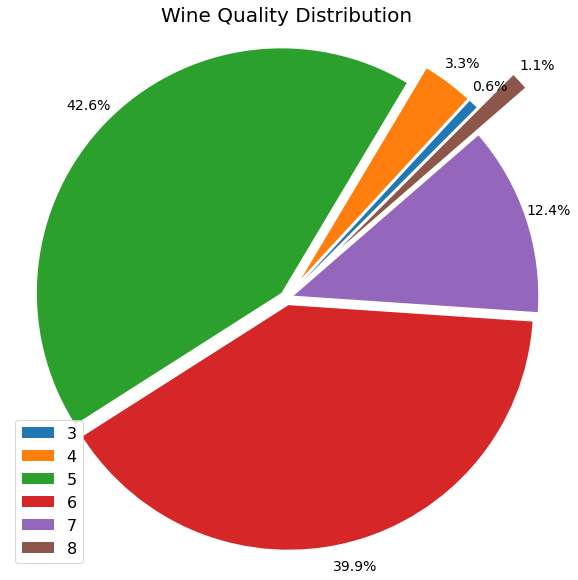

In [10]:
explode_list = [0.1, 0.1, 0.03, 0.03, 0.03, 0.3]
ax = quality.plot(kind='pie',
             figsize = (10,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             explode=explode_list,
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('Wine Quality Distribution', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=quality.index, loc="lower left", fontsize=16);

In [11]:
for col in columns:
    target_summary_with_num(data, target, col)

         fixed acidity
quality               
3             8.360000
4             7.779245
5             8.167254
6             8.347179
7             8.872362
8             8.566667


         volatile acidity
quality                  
3                0.884500
4                0.693962
5                0.577041
6                0.497484
7                0.403920
8                0.423333


         citric acid
quality             
3           0.171000
4           0.174151
5           0.243686
6           0.273824
7           0.375176
8           0.391111


         residual sugar
quality                
3              2.635000
4              2.694340
5              2.528855
6              2.477194
7              2.720603
8              2.577778


         chlorides
quality           
3         0.122500
4         0.090679
5         0.092736
6         0.084956
7         0.076588
8         0.068444


         free sulfur dioxide
quality                     
3                  11.000000

[back to contents &#10548;](#0.)
<a class="anchor" id="6."> 
<center> <h1 style="background-color:darkred; color:white" >Multi Plot &#128200;</h1>
    <center>
 <a/>

In [12]:
#The quality scores of the features will be used for those who will use the poster.

def multi_plot(dataset, rows, cols, plot_type):
    """
    dataset: Veri seti
    rows: Satır sayısı
    cols: sütün sayısı
    plot_type: Çizdirilecek grafik türü
    """
    
    # Getting the names of the columns in the dataset
    column_names=dataset.columns.values
    
    # How many columns are there
    number_of_column=len(column_names)
    
    # Creating matrix with subgraph in row*columns.. 
    # Matrix width:22 height:16
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0# It holds the index value in the column_names list of the property to be drawn
    for i in range(rows):
        for j in range(cols):
            """
            i: keeps the line number
            j: holds the column number
            axarr[i][j]: Determines the position of the drawn graph in the graph matrix
            """
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j],color="darkred")
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j],color="darkred")
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j],color="darkred")
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j],color="darkred")
            elif 'line' in plot_type:
                sns.lineplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j],color="darkred")
                
            counter+=1
            if counter==(number_of_column-1,):
                break

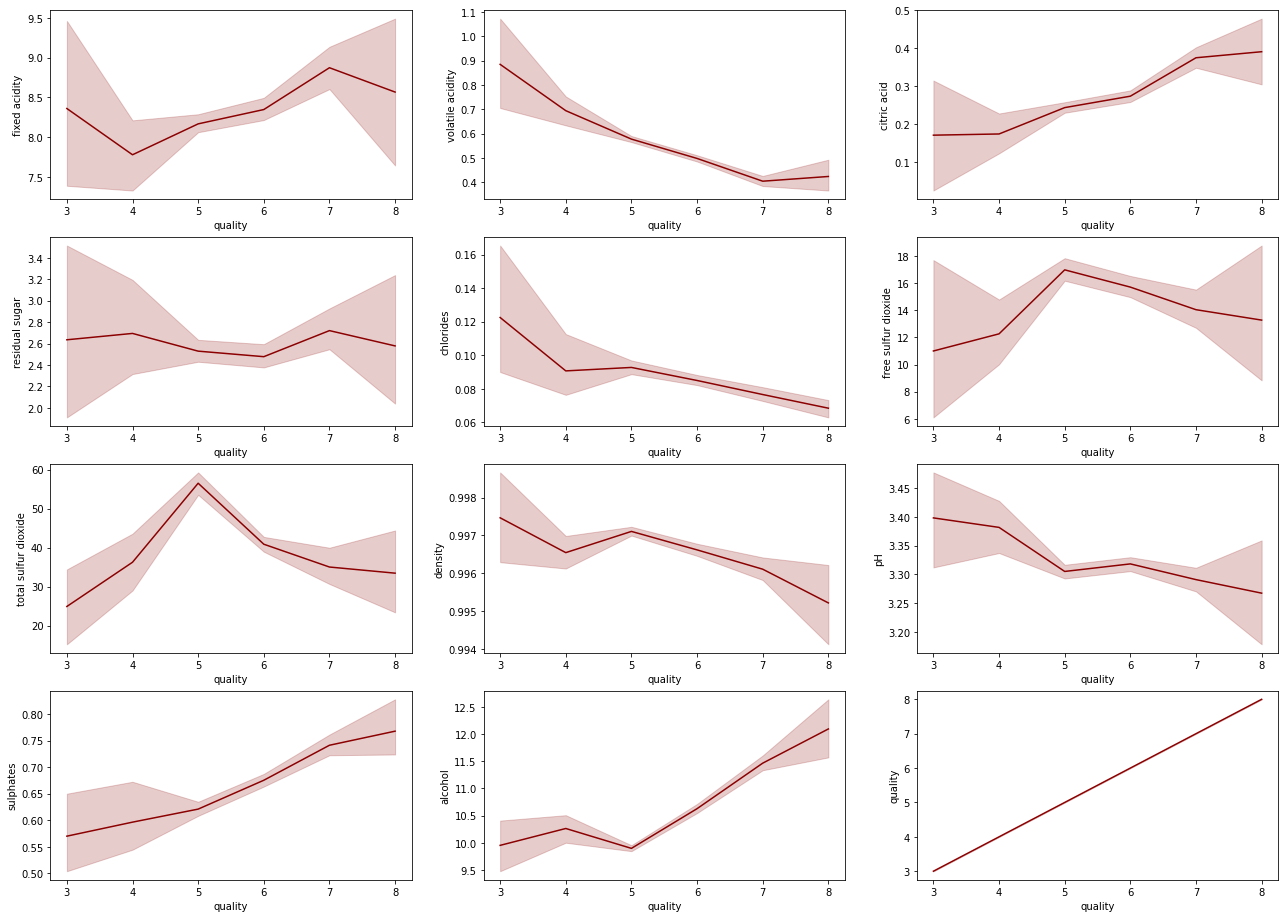

In [13]:
multi_plot(data, 4, 3,"line") # or violin,box,point,bar

[back to contents &#10548;](#0.)
<a class="anchor" id="7."> 
<center> <h1 style="background-color:darkred; color:white" >Heat Map</h1>
    <center>
 <a/>

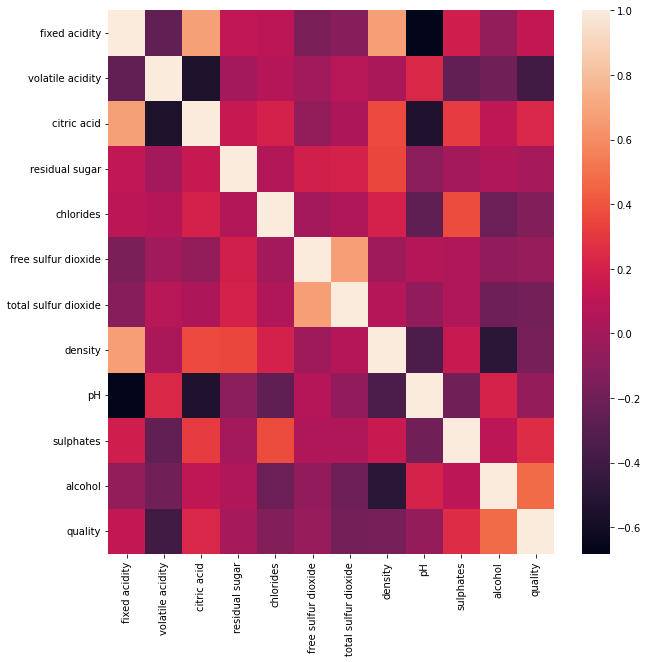

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr())
plt.show()

[back to contents &#10548;](#0.)
<a class="anchor" id="8."> 
<center> <h1 style="background-color:darkred; color:white" >Test-Train Split</h1>
    <center>
 <a/>

In [15]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [16]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

[back to contents &#10548;](#0.)
<a class="anchor" id="9."> 
<center> <h1 style="background-color:darkred; color:white" >Scaling Data</h1>
    <center>
 <a/>

In [19]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[back to contents &#10548;](#0.)
<a class="anchor" id="10."> 
<center> <h1 style="background-color:darkred; color:white" >Classifier Model</h1>
    <center>
 <a/>

[back to contents &#10548;](#0.)
<a class="anchor" id="10.1."> 
<center> <h1 style="background-color:darkred; color:white" >GradientBoostingClassifier</h1>
    <center>
 <a/>

In [20]:
gbm_model = GradientBoostingClassifier()

# Parameters Defined for the Test
gbm_params = {"learning_rate": [0.01, 0.02, 0.1],
              "max_depth": [5, 6, 7, 8],
              "n_estimators": [100, 200, 400, 600],
              "subsample": [0.3, 0.4, 0.6, 0.8]}

#Finding the Best Parameters
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [21]:
# Model Prepared with the Best Parameters
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17)
gbm_final.fit(X_train, y_train)
y_pred_gbm = gbm_final.predict(X_test)

[back to contents &#10548;](#0.)
<a class="anchor" id="10.2."> 
<center> <h1 style="background-color:darkred; color:white" >Random Forest &#127794;&#127794;</h1>
    <center>
 <a/>

In [22]:
rf_model = RandomForestClassifier()

# Parameters Defined for the Test
rf_params = {"max_depth": [7, 8, 9, 10],
             "max_features": [4, 5, 6, 7],
             "min_samples_split": [3, 4, 5, 6, 7],
             "n_estimators": [100, 200, 300]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [23]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17)
rf_final.fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)

[back to contents &#10548;](#0.)
<a class="anchor" id="10.3."> 
<center> <h1 style="background-color:darkred; color:white" >Light Gradient Boosting Machine &#128294;</h1>
    <center>
 <a/>

In [24]:
lgbm_model = LGBMClassifier()

# Parameters Defined for the Test
lgbm_params = {"learning_rate": [0.01, 0.02, 0.1],
              "max_depth": [5, 6, 7, 8],
              "n_estimators": [100, 200, 400, 600],
              "subsample": [0.3, 0.4, 0.6, 0.8]}

#Finding the Best Parameters
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [25]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17)
lgbm_final.fit(X_train, y_train)
y_pred_lgbm = lgbm_final.predict(X_test)

[back to contents &#10548;](#0.)
<a class="anchor" id="10.4."> 
<center> <h1 style="background-color:darkred; color:white" >KNeighbors Classifier</h1>
    <center>
 <a/>

In [26]:
KNe_model = KNeighborsClassifier()

# Parameters Defined for the Test
n_neighbors_params= {"n_neighbors": [3, 4, 5, 6, 7]}

#Finding the Best Parameters
KNe_best_grid = GridSearchCV(KNe_model, n_neighbors_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [27]:
KNe_final = KNe_model.set_params(**KNe_best_grid.best_params_)
KNe_final.fit(X_train, y_train)
y_pred_KNe = KNe_final.predict(X_test)

[back to contents &#10548;](#0.)
<a class="anchor" id="10.5."> 
<center> <h1 style="background-color:darkred; color:white" >Decision Tree Classifier &#127795;</h1>
    <center>
 <a/>

In [28]:
dtc_model = DecisionTreeClassifier()

# Parameters Defined for the Test
dtc_params = {"max_depth": [7, 8, 9, 10],
             "min_samples_split": [3, 4, 5, 6, 7]}

#Finding the Best Parameters
dtc_best_grid = GridSearchCV(dtc_model, dtc_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [29]:
dtc_final = dtc_model.set_params(**dtc_best_grid.best_params_, random_state=17)
dtc_final.fit(X_train, y_train)
y_pred_dtc = dtc_final.predict(X_test)

[back to contents &#10548;](#0.)
<a class="anchor" id="11."> 
<center> <h1 style="background-color:darkred; color:white" >Accuracy table of models</h1>
    <center>
 <a/>

In [30]:
models = ["Random Forest","Gradient Boosting Machine",
          "Light Gradient Boosting Machine","KNeighbors",
          "DecisionTreeClassifier"]

test_acc = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gbm),
    accuracy_score(y_test, y_pred_lgbm),
    accuracy_score(y_test, y_pred_KNe),
    accuracy_score(y_test, y_pred_dtc)   
]

cv_rf = cross_val_score(estimator = rf_final, X = X_train, y = y_train.ravel(), cv = 5)
cv_gbm = cross_val_score(estimator = gbm_final, X = X_train, y = y_train.ravel(), cv = 5)
cv_lgbm = cross_val_score(estimator = lgbm_final, X = X_train, y = y_train.ravel(), cv = 5)
cv_KNe = cross_val_score(estimator = KNe_final, X = X_train, y = y_train.ravel(), cv = 5)
cv_dtc = cross_val_score(estimator = dtc_final, X = X_train, y = y_train.ravel(), cv = 5)

cross_val_score = [
    
    cv_rf.mean(),
    cv_gbm.mean(),
    cv_lgbm.mean(),
    cv_KNe.mean(),
    cv_dtc.mean()
]

pd.DataFrame({
    
    "Model":models,
    "Cross Validation": cross_val_score,
    "Test Accuracy": test_acc
    
})

,Model,Cross Validation,Test Accuracy
0,Random Forest,0.655971,0.728125
1,Gradient Boosting Machine,0.655987,0.753125
2,Light Gradient Boosting Machine,0.650512,0.718750
3,KNeighbors,0.566866,0.587500
4,DecisionTreeClassifier,0.584835,0.612500
